# Logistic Reghression with ROC curve and ROC AUC score



 till now whatever logistic regression we were using, by default they have set threshold value as 0.5

In [20]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ROC and ROC AUC Score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [21]:
## Generate binary dataset 

X,y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [22]:
# Split the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [23]:
# Created a dummy model with default 0 as utput (majority class)

dummy_model_prob=[0 for _ in range(len(y_test))] # this will set the value of all y_test datapoints as 0 
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [24]:
# Lets create basic logistic regression model 
model=LogisticRegression()
model.fit(X_train,y_train)



LogisticRegression()

In [25]:
# Prediction based on probabilty 
model_prob=model.predict_proba(X_test) 

In [26]:
model_prob

array([[9.59354198e-01, 4.06458016e-02],
       [3.55102587e-01, 6.44897413e-01],
       [4.61036991e-01, 5.38963009e-01],
       [1.26765534e-01, 8.73234466e-01],
       [3.98492560e-01, 6.01507440e-01],
       [5.89004681e-01, 4.10995319e-01],
       [7.11999710e-02, 9.28800029e-01],
       [7.50321930e-01, 2.49678070e-01],
       [9.54385644e-01, 4.56143559e-02],
       [9.69602884e-01, 3.03971159e-02],
       [1.33956156e-01, 8.66043844e-01],
       [5.31819848e-01, 4.68180152e-01],
       [1.72347404e-01, 8.27652596e-01],
       [9.67809354e-01, 3.21906457e-02],
       [2.30046680e-01, 7.69953320e-01],
       [6.14802703e-01, 3.85197297e-01],
       [5.64943790e-01, 4.35056210e-01],
       [9.92521843e-01, 7.47815672e-03],
       [6.25866400e-01, 3.74133600e-01],
       [9.86718726e-01, 1.32812744e-02],
       [9.84853282e-01, 1.51467175e-02],
       [4.15877937e-02, 9.58412206e-01],
       [8.20879654e-01, 1.79120346e-01],
       [2.69178122e-02, 9.73082188e-01],
       [2.755166

In [27]:
# Lets focus on positive outcome
model_prob=model_prob[:,1]

In [29]:
## Lets calulcate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9232456140350878


In [30]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [31]:
thresholds

array([           inf, 9.99553764e-01, 9.39496987e-01, 9.36732025e-01,
       9.13252414e-01, 9.09991853e-01, 8.95270782e-01, 8.95036262e-01,
       8.69913569e-01, 8.66043844e-01, 8.57581727e-01, 8.48810315e-01,
       8.45140783e-01, 8.42623874e-01, 8.03371057e-01, 8.01282475e-01,
       7.89459343e-01, 7.76579862e-01, 7.28221281e-01, 7.13478526e-01,
       6.01507440e-01, 5.82911698e-01, 5.14429540e-01, 5.04637901e-01,
       5.03669367e-01, 5.03073298e-01, 4.69001994e-01, 4.63040656e-01,
       4.56979367e-01, 4.55023943e-01, 4.50531614e-01, 4.36245243e-01,
       4.35056210e-01, 4.19808622e-01, 4.14620476e-01, 4.10995319e-01,
       3.90139627e-01, 3.66392184e-01, 3.62088932e-01, 2.97027861e-01,
       2.81723864e-01, 2.71874667e-01, 2.58848472e-01, 2.32154964e-01,
       2.31693719e-01, 2.30369604e-01, 2.03918182e-01, 1.38454674e-01,
       1.35189789e-01, 1.29272162e-01, 1.28501963e-01, 1.18052536e-01,
       1.16130995e-01, 8.98411999e-02, 8.75397210e-02, 9.23284478e-03,
      

In [32]:
model_fpr,model_tpr

(array([0.        , 0.        , 0.        , 0.00877193, 0.00877193,
        0.01754386, 0.01754386, 0.02631579, 0.02631579, 0.03508772,
        0.03508772, 0.04385965, 0.04385965, 0.05263158, 0.05263158,
        0.06140351, 0.06140351, 0.07017544, 0.07017544, 0.09649123,
        0.09649123, 0.11403509, 0.11403509, 0.12280702, 0.12280702,
        0.13157895, 0.13157895, 0.14912281, 0.14912281, 0.15789474,
        0.15789474, 0.16666667, 0.16666667, 0.1754386 , 0.1754386 ,
        0.18421053, 0.18421053, 0.21929825, 0.21929825, 0.27192982,
        0.27192982, 0.28070175, 0.28070175, 0.31578947, 0.31578947,
        0.3245614 , 0.3245614 , 0.40350877, 0.40350877, 0.44736842,
        0.44736842, 0.48245614, 0.48245614, 0.54385965, 0.54385965,
        0.9122807 , 0.9122807 , 1.        ]),
 array([0.        , 0.00735294, 0.29411765, 0.29411765, 0.36764706,
        0.36764706, 0.40441176, 0.40441176, 0.48529412, 0.48529412,
        0.49264706, 0.49264706, 0.5       , 0.5       , 0.59558824,
  

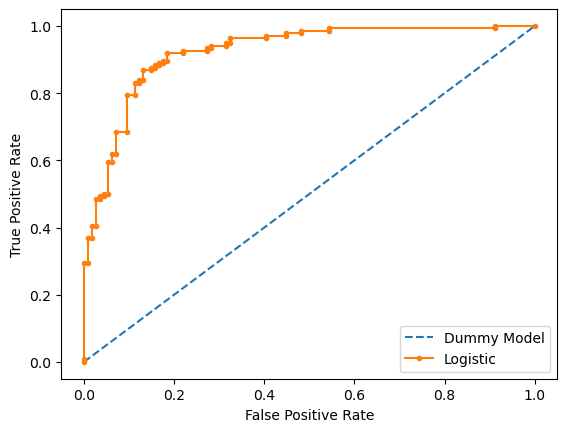

In [33]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()